# <div style="text-align: center; background-color: #1DA1F2; font-family: 'Arial', sans-serif; color: white; padding: 20px; line-height: 2; font-size: 46px; border-radius: 10px; box-shadow: 0px 0px 10px rgba(0, 0, 0, 0.5);">Twitter Sentiment Analysis 🕊️</div>


<div id='2.2' style='background-color:orange;text-align:left;padding:4px'>
    <h3 style='color:black;font-size: 26px;font-family:"Courier New", Courier, monospace'> About Dataset</h3>
</div>


The dataset consists of message, entity, and sentiment in Twitter. There are three classes in the dataset: positive, negative, and neutral. The messages that are not relevant to the entity should be regarded as neutral.

* Tweet ID: ID of Tweet
    
* Entity: Entity that Tweet talks about
    
* Sentiment: Sentiment of the tweet text regarding the entity Positive, Negative, Neutral, Irrelevant
    
* Tweet Content: Tweet Text


<div id='2.1' style='background-color:orange;text-align:left;padding:4px'>
    <h3 style='color:black;font-size: 26px;font-family:"Courier New", Courier, monospace'> Import Libraries </h3>
</div>
 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import warnings
warnings.filterwarnings('ignore')

C:\Users\lenovo\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
train=pd.read_csv('twitter_training.csv',names=col_names)
train

ID       Entity Sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   
...     ...          ...       ...   
74677  9200       Nvidia  Positive   
74678  9200       Nvidia  Positive   
74679  9200       Nvidia  Positive   
74680  9200       Nvidia  Positive   
74681  9200       Nvidia  Positive   

                                                 Content  
0      im getting on borderlands and i will murder yo...  
1      I am coming to the borders and I will kill you...  
2      im getting on borderlands and i will kill you ...  
3      im coming on borderlands and i will murder you...  
4      im getting on borderlands 2 and i will murder ...  
...                                                  ...  
74677  Just realized that the Windows partition of my...  
74678  Just realized that my Mac window partition is ...  
74679  Just realized the windows partition of my Mac ...  
74680  Just realized between the windows partition of...  
74681  Just like the windows partition of my Mac is l...  

[74682 rows x 4 columns]

In [6]:
col_names = ['ID', 'Entity', 'Sentiment', 'Content']
test=pd.read_csv('twitter_validation.csv',names=col_names)
test

ID               Entity   Sentiment  \
0    3364             Facebook  Irrelevant   
1     352               Amazon     Neutral   
2    8312            Microsoft    Negative   
3    4371                CS-GO    Negative   
4    4433               Google     Neutral   
..    ...                  ...         ...   
995  4891  GrandTheftAuto(GTA)  Irrelevant   
996  4359                CS-GO  Irrelevant   
997  2652          Borderlands    Positive   
998  8069            Microsoft    Positive   
999  6960      johnson&johnson     Neutral   

                                               Content  
0    I mentioned on Facebook that I was struggling ...  
1    BBC News - Amazon boss Jeff Bezos rejects clai...  
2    @Microsoft Why do I pay for WORD when it funct...  
3    CSGO matchmaking is so full of closet hacking,...  
4    Now the President is slapping Americans in the...  
..                                                 ...  
995  ⭐️ Toronto is the arts and culture capital of ...  
996  tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...  
997  Today sucked so it’s time to drink wine n play...  
998  Bought a fraction of Microsoft today. Small wins.  
999  Johnson & Johnson to stop selling talc baby po...  

[1000 rows x 4 columns]

In [7]:
df=train.append(test)

In [8]:
df.head()

ID       Entity Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                             Content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...

<div id='2.3' style='background-color:orange;text-align:left;padding:4px;font-size: 26px'>
    <h3 style='color:black;font-family:"Courier New", Courier, monospace'> Exploratory Data Analysis </h3>
</div>

In [9]:
df.shape

(75682, 4)

In [13]:
df.describe(include='object')

Entity Sentiment Content
count                  75682     75682   74996
unique                    32         4   69974
top     TomClancysRainbowSix  Negative        
freq                    2435     22808     172

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75682 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         75682 non-null  int64 
 1   Entity     75682 non-null  object
 2   Sentiment  75682 non-null  object
 3   Content    74996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.9+ MB


In [14]:
### ID column is irrelevant. So I can remove ID
df.drop(columns=['ID'],axis=1,inplace=True)

In [15]:
df.head()

Entity Sentiment                                            Content
0  Borderlands  Positive  im getting on borderlands and i will murder yo...
1  Borderlands  Positive  I am coming to the borders and I will kill you...
2  Borderlands  Positive  im getting on borderlands and i will kill you ...
3  Borderlands  Positive  im coming on borderlands and i will murder you...
4  Borderlands  Positive  im getting on borderlands 2 and i will murder ...

In [12]:
df.isnull().sum()

ID             0
Entity         0
Sentiment      0
Content      686
dtype: int64

There is only 686 columns with null values are present. It is a small amount compare to the whole dataset. So I remove this rows with null values.

In [16]:
df.dropna(subset=['Content'],inplace=True)

In [17]:
df.isnull().sum()

Entity       0
Sentiment    0
Content      0
dtype: int64

In [18]:
df['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

I want to replace 'Irrelevant' to 'Neutral'

In [19]:
df['Sentiment']=df['Sentiment'].replace('Irrelevant','Neutral')

In [20]:
df['Sentiment'].value_counts()

Neutral     31440
Negative    22624
Positive    20932
Name: Sentiment, dtype: int64

<div id='2.3' style='background-color:#800080;text-align:left;padding:4px;font-size: 17px'>
    <h3 style='color:white;font-family:Georgia, serif'> Sentiment Distribution Plot </h3>
</div>

<AxesSubplot:xlabel='Sentiment', ylabel='count'>

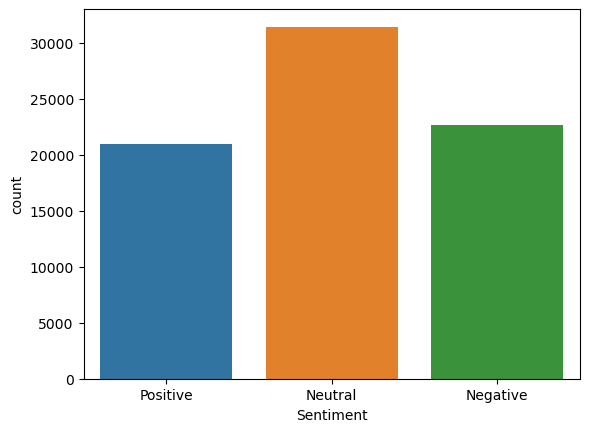

In [21]:
sns.countplot('Sentiment',data=df)

In [22]:
df['Entity'].unique()

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [23]:
df['Entity'].value_counts()

LeagueOfLegends                      2414
CallOfDuty                           2407
MaddenNFL                            2406
TomClancysRainbowSix                 2399
Verizon                              2397
Facebook                             2395
ApexLegends                          2389
Microsoft                            2389
WorldOfCraft                         2387
Dota2                                2386
CallOfDutyBlackopsColdWar            2370
NBA2K                                2364
johnson&johnson                      2363
FIFA                                 2362
Overwatch                            2348
TomClancysGhostRecon                 2343
Battlefield                          2342
GrandTheftAuto(GTA)                  2328
PlayStation5(PS5)                    2324
Hearthstone                          2318
CS-GO                                2316
Borderlands                          2313
HomeDepot                            2310
Amazon                            

<div id='2.3' style='background-color:#800080;text-align:left;padding:4px;font-size: 17px'>
    <h3 style='color:white;font-family:Georgia, serif'> Entity Distribution Plot</h3>
</div>

In [24]:
# top 5 entities
labels=df['Entity'].value_counts().index
values=df['Entity'].value_counts().values
plt.pie(values[:5],labels=labels[:5],autopct='%1.2f%%')

([<matplotlib.patches.Wedge at 0x209e466f3d0>,
 [Text(0.8883279121639378, 0.6487476554643256, 'LeagueOfLegends'),
  Text(-0.34570871509048556, 1.0442631298243203, 'CallOfDuty'),
  Text(-1.099976529776406, -0.007185676102915854, 'MaddenNFL'),
  Text(-0.33422780455978435, -1.0479941672829802, 'TomClancysRainbowSix'),
  Text(0.8912009239771729, -0.6447952489761641, 'Verizon')],
 [Text(0.484542497543966, 0.35386235752599576, '20.08%'),
  Text(-0.18856839004935574, 0.5695980708132656, '20.02%'),
  Text(-0.5999871980598577, -0.003919459692499556, '20.01%'),
  Text(-0.1823060752144278, -0.5716331821543528, '19.95%'),
  Text(0.4861095948966397, -0.35170649944154403, '19.94%')])

Top 5 entities are

1.LeagueOfLegends

2.CallOfDuty

3.MaddenNFL

4.TomClancysRainbowSix

5.Verizon

<div id='2.3' style='background-color:#800080;text-align:left;padding:4px;font-size: 17px'>
    <h3 style='color:white;font-family:Georgia, serif'> Sentiment Distribution in Top 3 Entities </h3>
</div>

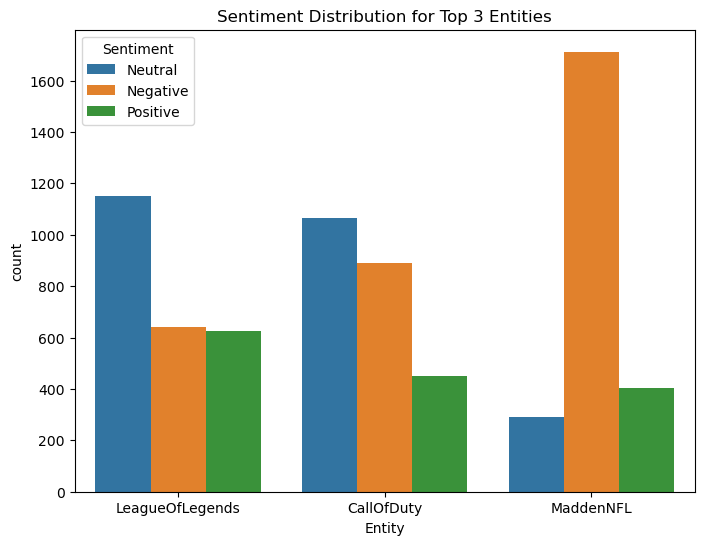

In [25]:
top_entities = df['Entity'].value_counts().head(3).index.tolist()
filtered_df = df[df['Entity'].isin(top_entities)]
plt.figure(figsize=(8, 6))  
sns.countplot(data=filtered_df, x='Entity', hue='Sentiment')
plt.title('Sentiment Distribution for Top 3 Entities')
plt.show()

In [26]:
## drop 'Entity' column because it havn't any effect on sentiment analysis

df.drop(columns=['Entity'],axis=1,inplace=True)

In [27]:
df.head()

Sentiment                                            Content
0  Positive  im getting on borderlands and i will murder yo...
1  Positive  I am coming to the borders and I will kill you...
2  Positive  im getting on borderlands and i will kill you ...
3  Positive  im coming on borderlands and i will murder you...
4  Positive  im getting on borderlands 2 and i will murder ...

<div id='2.2' style='background-color:orange;text-align:left;padding:4px;font-size:26px'>
    <h3 style='color:black;font-family:"Courier New", Courier, monospace'> Text Analysis with NLP Preprocessing </h3>
</div>

In [34]:
import nltk
import string
stemmer = nltk.SnowballStemmer("english")
# from nltk.stem import PorterStemmer
# stemmer = PorterStemmer()
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [35]:
from nltk.corpus import stopwords
stopwords=set(stopwords.words('english'))
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [37]:
def clean(text):
    text=str(text).lower()
     # Remove text within square brackets
    text=re.sub('\[.*?\]','',text)
    # Remove URLs
    text=re.sub('https?://\S+|www\.\S+','',text)
    # Remove HTML tags
    text = re.sub('<.*?>+', '', text)
    #  Removing Punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Replace newline characters with spaces
    text = re.sub('\n', '', text)
    # Remove words containing digits
    text = re.sub('\w*\d\w*', '', text)
     # Tokenize the text and remove stopwords
    text = [word for word in text.split(' ') if word not in stopwords]
    text=" ".join(text)
    # Stem the remaining words
    text = [stemmer.stem(word) for word in text.split(' ')]
    # Join the cleaned and stemmed words back into a string
    text=" ".join(text)
    return text
df['Content'] = df['Content'].apply(clean)

In [38]:
df['Content']

0                              im get borderland murder 
1                                       come border kill
2                                 im get borderland kill
3                              im come borderland murder
4                              im get borderland  murder
                             ...                        
995     toronto art cultur capit canada wonder want s...
996    actual good move tot bring viewersi one peopl ...
997    today suck time drink wine n play borderland s...
998            bought fraction microsoft today small win
999    johnson  johnson stop sell talc babi powder us...
Name: Content, Length: 74996, dtype: object

In [39]:
text=df['Content'].values
text

array(['im get borderland murder ', 'come border kill',
       'im get borderland kill', ...,
       'today suck time drink wine n play borderland sun come hate day tomorrow',
       'bought fraction microsoft today small win',
       'johnson  johnson stop sell talc babi powder us canada  reuter '],
      dtype=object)

In [40]:
# Step 1: Tokenization
tokens = []
for sentence in text:
    tokens.extend(sentence.split())

In [41]:
# Step 2: Frequency Count
word_count = {}
for token in tokens:
    if token in word_count:
        word_count[token] += 1
    else:
        word_count[token] = 1

In [42]:
word_count

{'im': 5031,
 'get': 5742,
 'borderland': 1595,
 'murder': 116,
 'come': 1827,
 'border': 64,
 'kill': 1130,
 'spent': 191,
 'hour': 861,
 'make': 2981,
 'someth': 968,
 'fun': 1592,
 'dont': 2714,
 'know': 2044,
 'huge': 431,
 'fan': 624,
 'maya': 30,
 'one': 3768,
 'favorit': 654,
 'charact': 574,
 'decid': 285,
 'wallpap': 15,
 'pc': 782,
 'origin': 366,
 'imag': 113,
 'versus': 18,
 'creation': 7,
 'made': 1068,
 'enjoy': 907,
 'coupl': 165,
 'here': 199,
 'pictur': 182,
 'compar': 123,
 'pictwittercom': 871,
 'rhandlerr': 2004,
 'rockhard': 4,
 'la': 70,
 'varlop': 4,
 'rare': 68,
 'power': 548,
 'handsom': 74,
 'jackpot': 7,
 'xbox': 2169,
 'dlvritrmtrgf': 3,
 'dlvrit': 64,
 'rmtrgf': 3,
 'dfrit': 7,
 'vita': 12,
 'live': 1553,
 'rock': 131,
 'hard': 617,
 'music': 407,
 'sega': 27,
 'dlvr': 66,
 'e': 333,
 'ihard': 1,
 'like': 5292,
 'london': 25,
 'de': 106,
 'first': 1760,
 'session': 96,
 'long': 683,
 'time': 3595,
 'actual': 1282,
 'realli': 3300,
 'satisfi': 108,
 'combat'

In [43]:
# Step 3: Vocabulary Size
vocab_size = len(word_count)
print("Vocabulary size:", vocab_size)

Vocabulary size: 25162


In [45]:
corpus=''.join(i for i in df['Content'])

In [46]:
corpus

'im get borderland murder come border killim get borderland killim come borderland murderim get borderland  murderim get borderland murderspent hour make someth fun   dont know huge borderland fan maya one favorit charact decid make wallpap pc  origin imag versus creation made  enjoy spent coupl hour someth fun dont know im huge  borderland fan maya one favorit charact decid make wallpap pc here origin pictur compar creation made fun pictwittercom  spent hour someth fun dont know im huge  borderland fan maya one favorit charactspent hour make someth fun   dont know huge rhandlerr fan maya one favorit charact decid make wallpap pc  origin imag versus creation made  enjoy  spent hour make someth fun   dont know huge rhandlerr fan maya one favorit charact decid make wallpap pc  origin imag versus creation made  enjoy rockhard la varlop rare  power handsom jackpot borderland  xbox dlvritrmtrgf  rockhard la varlop rare  power handsom jackpot borderland  xbox dlvrit  rmtrgfrockhard la varlop

In [47]:
data_cleaned=pd.DataFrame()
data_cleaned['Content']=df["Content"].apply(clean)
data_cleaned['Sentiment']=df['Sentiment']
data_cleaned

Content Sentiment
0                            im get borderland murder   Positive
1                                     come border kill  Positive
2                               im get borderland kill  Positive
3                            im come borderland murder  Positive
4                            im get borderland  murder  Positive
..                                                 ...       ...
995   toronto art cultur capit canada wonder want s...   Neutral
996  actual good move tot bring viewersi one peopl ...   Neutral
997  today suck time drink wine n play borderland s...  Positive
998          bought fraction microsoft today small win  Positive
999  johnson  johnson stop sell talc babi powder us...   Neutral

[74996 rows x 2 columns]

In [50]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data_cleaned.Sentiment = encoder.fit_transform(data_cleaned.Sentiment)

In [51]:
encoder.classes_

array(['Negative', 'Neutral', 'Positive'], dtype=object)

In [52]:
data_cleaned.head()

Content  Sentiment
0  im get borderland murder           2
1           come border kill          2
2     im get borderland kill          2
3  im come borderland murder          2
4  im get borderland  murder          2

In [53]:
X = data_cleaned['Content']
y = data_cleaned['Sentiment']

In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()

In [56]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [57]:
X_train_normalized = v.fit_transform(x_train)
X_test_normalized = v.transform(x_test)

<div id='2.3' style='background-color:orange;text-align:left;padding:4px;font-size: 26px'>
    <h3 style='color:black;font-family:"Courier New", Courier, monospace'> Logistic Regression </h3>
</div>

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_normalized, y_train)

LogisticRegression()

In [60]:
y_pred = model.predict(X_test_normalized)

In [61]:
#Showing Model Summary
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix, ConfusionMatrixDisplay
print('Classification Report:\n', classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.75      0.77      4464
           1       0.76      0.83      0.79      6372
           2       0.78      0.72      0.75      4164

    accuracy                           0.78     15000
   macro avg       0.78      0.77      0.77     15000
weighted avg       0.78      0.78      0.78     15000



In [62]:
score=accuracy_score(y_test, y_pred)
score

0.7763333333333333

In [63]:
#Visualizing Model Results
t1 = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
t1.plot()

<div id='2.3' style='background-color:orange;text-align:left;padding:4px;font-size: 26px'>
    <h3 style='color:black;font-family:"Courier New", Courier, monospace'> RandomForest Classifier </h3>
</div>

In [64]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=60)
rf_clf.fit(X_train_normalized, y_train)

RandomForestClassifier(n_estimators=60)

In [65]:
y_pred = rf_clf.predict(X_test_normalized)

In [66]:
print(accuracy_score(y_test, y_pred))

0.914


In [67]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92      4464
           1       0.89      0.95      0.92      6372
           2       0.93      0.87      0.90      4164

    accuracy                           0.91     15000
   macro avg       0.92      0.91      0.91     15000
weighted avg       0.92      0.91      0.91     15000



<div id='2.3' style='background-color:orange;text-align:left;padding:4px;font-size: 26px'>
    <h3 style='color:black;font-family:"Courier New", Courier, monospace'> LSTM </h3>
</div>

In [68]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense

In [70]:
text=data_cleaned['Content'].values
text

array(['im get borderland murder ', 'come border kill',
       'im get borderland kill', ...,
       'today suck time drink wine n play borderland sun come hate day tomorrow',
       'bought fraction microsoft today small win',
       'johnson  johnson stop sell talc babi powder us canada  reuter '],
      dtype=object)

In [77]:
vocab_size = len(word_count)

In [78]:
print("Vocabulary size:", vocab_size)

Vocabulary size: 25162


In [92]:
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)

In [93]:
sequences

[[5, 3, 67, 1142],
 [53, 1755, 115],
 [5, 3, 67, 115],
 [5, 53, 67, 1142],
 [5, 3, 67, 1142],
 [5, 3, 67, 1142],
 [747,
  159,
  16,
  137,
  68,
  22,
  39,
  337,
  67,
  224,
  2800,
  9,
  215,
  250,
  508,
  16,
  4253,
  173,
  392,
  1169,
  3820,
  6414,
  121,
  148],
 [747,
  869,
  159,
  137,
  68,
  22,
  39,
  5,
  337,
  67,
  224,
  2800,
  9,
  215,
  250,
  508,
  16,
  4253,
  173,
  392,
  779,
  1095,
  6414,
  121,
  68,
  156],
 [747, 159, 137, 68, 22, 39, 5, 337, 67, 224, 2800, 9, 215, 250],
 [747,
  159,
  16,
  137,
  68,
  22,
  39,
  337,
  41,
  224,
  2800,
  9,
  215,
  250,
  508,
  16,
  4253,
  173,
  392,
  1169,
  3820,
  6414,
  121,
  148],
 [747,
  159,
  16,
  137,
  68,
  22,
  39,
  337,
  41,
  224,
  2800,
  9,
  215,
  250,
  508,
  16,
  4253,
  173,
  392,
  1169,
  3820,
  6414,
  121,
  148],
 [],
 [11398, 1603, 11399, 1674, 265, 1589, 5411, 67, 32, 13158],
 [11398, 1603, 11399, 1674, 265, 1589, 5411, 67, 32, 1756, 13159],
 [11398, 1603

In [94]:
x=tokenizer.texts_to_sequences(text)

In [95]:
x= pad_sequences(x)

In [96]:
x

array([[   0,    0,    0, ...,    3,   67, 1142],
       [   0,    0,    0, ...,   53, 1755,  115],
       [   0,    0,    0, ...,    3,   67,  115],
       ...,
       [   0,    0,    0, ...,  132,   30,  395],
       [   0,    0,    0, ...,   61,  589,   96],
       [   0,    0,    0, ...,   46,  716, 3242]])

In [97]:
x.shape

(74996, 163)

In [98]:
# max_feature=10000

In [99]:
model=Sequential([
   tf.keras.layers.Embedding(vocab_size,output_dim=100,input_length=x.shape[1]),
   tf.keras.layers.LSTM(64),
   tf.keras.layers.Dense(3,activation='softmax')
    ]
)

In [100]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

In [101]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 163, 100)          2516200   
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 2558635 (9.76 MB)
Trainable params: 2558635 (9.76 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [102]:
Y=pd.get_dummies(data_cleaned['Sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(x,Y, test_size = 0.33, random_state = 42)


In [103]:
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(50247, 163) (50247, 3)
(24749, 163) (24749, 3)


In [105]:
model.fit(X_train, Y_train, epochs = 15,batch_size=150,verbose = 2)

Epoch 1/15
335/335 - 127s - loss: 0.7152 - accuracy: 0.6886 - 127s/epoch - 379ms/step
Epoch 2/15
335/335 - 125s - loss: 0.4206 - accuracy: 0.8309 - 125s/epoch - 375ms/step
Epoch 3/15
335/335 - 126s - loss: 0.3021 - accuracy: 0.8797 - 126s/epoch - 376ms/step
Epoch 4/15
335/335 - 126s - loss: 0.2440 - accuracy: 0.9029 - 126s/epoch - 376ms/step
Epoch 5/15
335/335 - 127s - loss: 0.2067 - accuracy: 0.9177 - 127s/epoch - 378ms/step
Epoch 6/15
335/335 - 126s - loss: 0.1839 - accuracy: 0.9268 - 126s/epoch - 377ms/step
Epoch 7/15
335/335 - 127s - loss: 0.1684 - accuracy: 0.9324 - 127s/epoch - 378ms/step
Epoch 8/15
335/335 - 125s - loss: 0.1522 - accuracy: 0.9392 - 125s/epoch - 374ms/step
Epoch 9/15
335/335 - 122s - loss: 0.1411 - accuracy: 0.9433 - 122s/epoch - 363ms/step
Epoch 10/15
335/335 - 126s - loss: 0.1300 - accuracy: 0.9476 - 126s/epoch - 375ms/step
Epoch 11/15
335/335 - 123s - loss: 0.1215 - accuracy: 0.9506 - 123s/epoch - 366ms/step
Epoch 12/15
335/335 - 128s - loss: 0.1118 - accuracy

In [106]:
model.fit(X_test, Y_test, epochs = 15,batch_size=150,verbose = 2)

Epoch 1/15
165/165 - 60s - loss: 0.4028 - accuracy: 0.8609 - 60s/epoch - 365ms/step
Epoch 2/15
165/165 - 61s - loss: 0.1880 - accuracy: 0.9296 - 61s/epoch - 368ms/step
Epoch 3/15
165/165 - 61s - loss: 0.1321 - accuracy: 0.9484 - 61s/epoch - 367ms/step
Epoch 4/15
165/165 - 60s - loss: 0.1036 - accuracy: 0.9591 - 60s/epoch - 366ms/step
Epoch 5/15
165/165 - 61s - loss: 0.0884 - accuracy: 0.9640 - 61s/epoch - 368ms/step
Epoch 6/15
165/165 - 41s - loss: 0.0780 - accuracy: 0.9675 - 41s/epoch - 246ms/step
Epoch 7/15
165/165 - 36s - loss: 0.0726 - accuracy: 0.9688 - 36s/epoch - 219ms/step
Epoch 8/15
165/165 - 37s - loss: 0.0678 - accuracy: 0.9706 - 37s/epoch - 224ms/step
Epoch 9/15
165/165 - 36s - loss: 0.0647 - accuracy: 0.9719 - 36s/epoch - 219ms/step
Epoch 10/15
165/165 - 36s - loss: 0.0660 - accuracy: 0.9705 - 36s/epoch - 220ms/step
Epoch 11/15
165/165 - 37s - loss: 0.0645 - accuracy: 0.9722 - 37s/epoch - 226ms/step
Epoch 12/15
165/165 - 37s - loss: 0.0665 - accuracy: 0.9719 - 37s/epoch - 


<div id='2.3' style='background-color:white;text-align:right;padding:4px;font-size: 16px'>
    <h3 style='color:black;font-family:"Courier New", Courier, monospace'> Submitted by ARATHI M </h3>
</div>